## Data Visualization Functions:


### Set up:
Import packages

In [1]:
import pandas as pd
import altair as alt
from altair_saver import save
import seaborn as sns
sns.set(style="darkgrid", palette = 'muted')

Establish input and output directories

In [2]:
curr_directory = '/Users/elizabethpierotti/Desktop/school/python/final project/data/processed'
output_directory = '../reports/figures/'

Select csv/data to visualize

In [3]:
datafname = 'poster_data.csv'

Import data from input directory and view it

In [4]:
df = pd.read_csv(curr_directory + '/'+ datafname)
df

,Subject,Group,Condition,Electrode,MNA,Age_mos,Gender,Bilingual,Region,TiS_months,Age_implant_mos,CIs
0,818,HG,Related,Fz,-40.828,78,F,no,Frontal,78,NaN,NaN
1,818,HG,Related,F3,-39.544,78,F,no,Frontal,78,NaN,NaN
2,818,HG,Related,F7,-35.380,78,F,no,Frontal,78,NaN,NaN
3,818,HG,Related,C3,-30.548,78,F,no,Central,78,NaN,NaN
4,818,HG,Related,Cz,-34.012,78,F,no,Central,78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
769,N4C13,HG,Unrelated,Cz,-26.128,85,M,yes,Central,85,NaN,NaN
770,N4C13,HG,Unrelated,Pz,-8.358,85,M,yes,Posterior,85,NaN,NaN
771,N4C13,HG,Unrelated,F8,-8.103,85,M,yes,Frontal,85,NaN,NaN
772,N4C13,HG,Unrelated,F4,-26.070,85,M,yes,Frontal,85,NaN,NaN


Define hard-coded variables that will be consistently used throughout script

In [10]:
x = ['Condition', 'Group','Region', 'Age_mos']
xlab = ['Condition', 'Group','Region', 'Age (months)']
y = ['MNA']
ylab = ['Mean Amplitude (microvolts)']
tt_interactive = ['Subject', 'Age_mos', 'Bilingual', 'TiS_months'] # these are values that will be reported on a point in interactive altair plots
#factors = (or this could be where you list out different condition names, etc)
#factors_lab = 

### histogram: 
plot distribution of y in histrogram format. won't work if df has more than 5000 rows.
- required packages: altair, altair saver
- inputs: df, y, x1 
- outputs: plot, automatically saves plot as a .png to output directory

In [6]:
def histogram(df, y):
    if df.shape[0] >5000:
        return 'The dataframe is too large. Subset the data or use a different dataframe.'
    else:
        return alt.Chart(df).mark_bar().encode(alt.X(y,title= ylab[0], bin = True), y = 'count()', )

# test case:
histogram(df, y[0])

alt.Chart(...)

### bar_graph: 
plot mean differences in Y across different Xs (option for grouped)
- required packages: seaborn
- inputs: df, x0, y, x1 (to group)
- outputs: plot, automatically saves plot as a .png to output directory

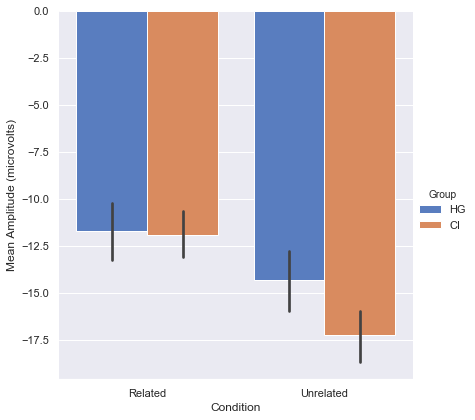

In [8]:
def bar_graph(df,x,y,z):
    g = sns.catplot(x=x, y=y, 
                hue=z, # use this to group, if needed
                data=df,
                height=6, kind="bar")
    g.despine(left=True)
    g.set_ylabels(ylab[0])
    g.set_xlabels(xlab[0])
    #g.set_xticklabels(rotation=45) #can turn off if you don't need axes rotated
    g.set_titles('Mean Differences in '+ylab[0])
    g.savefig(output_directory+ 'Mean Differences in '+y+'.png')
    return g

# test case:
bar_graph(df,x[0],y[0],x[1])

### stacked_bar_graph: 
plot proportions in a stacked bar graph (y will be count information, such proportion of saccades, that can be summed)
- required packages: altair, altair saver
- inputs: df, x0, y, x1 (to organize by color)
- outputs: plot that can be saved

In [10]:
def stacked_bar_graph(df,x,y,z):
    return alt.Chart(df).mark_bar().encode(
        x=x,
        y='sum('+y+')',
        color=z,
    ).properties(
    title='Proportions of 'z+' by '+x    
)
     
# test case:
stacked_bar_graph(df,x[0],y,x[1])

alt.Chart(...)

### scatter_plot: 
plot two continuous variables. Will also have interactive features.
- required packages: altair, altair saver
- inputs: df, x, y, z
- outputs: plot that can be saved

In [13]:
def scatter_plot(df,x,y,z):
    return alt.Chart(df).mark_circle(size=60).encode(
    x=x,
    y=y,
    color=z,
    tooltip= tt_interactive
    ).interactive().properties(
    title='Scatterplot of '+x+' by '+y)
     
# test case:
scatter_plot(df,x[3],y[0],x[1])

alt.Chart(...)

### scatter_matrix: 
plots a lot of scatter plots based on a bunch of variables of interest
- required packages: altair, altair saver
- inputs: df, x (list of vars), z (group, optional)
- outputs: plot that can be saved

In [19]:
def scatter_matrix(df,x,z):
    x_inverse = x[::-1] 
    return alt.Chart(df).mark_circle().encode(
        alt.X(alt.repeat("column"), type='quantitative'),
        alt.Y(alt.repeat("row"), type='quantitative'),
        color=z+':N'
    ).properties(
        width=150,
        height=150
    ).repeat(
        row=x,
        column= x_inverse
    ).interactive()

# test case:
scatter_matrix(df,x,x[1])

alt.RepeatChart(...)

### violin: 
plots the distribution of several variables of interest
- required packages: seaborn
- inputs: df, x, y, z (group, optional)
- outputs: plot that can be saved

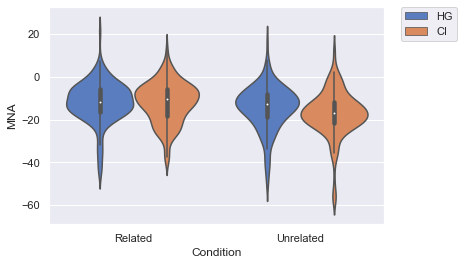

In [55]:
def violin(df,x,y,z):
    ax = sns.violinplot(x=x, y=y, 
                    hue=z, #optional
                    data=df)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    return ax
    # no option to save? not sure, says subplots can't be saved...
    

# test case:
violin(df,x[0],y[0],x[1])

### regression_plot: 
plots the distribution of several variables of interest
- required packages: pandas, seaborn
- inputs: df, x, y, z (group, optional)
- outputs: plot that can be saved

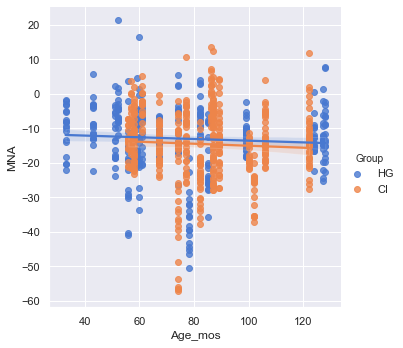

In [48]:
def regression_plot(df,x,y,z):
    g = sns.lmplot(x=x, y=y, hue=z,
               data=df)
    g.savefig(output_directory+ 'Regression Plot of '+x+' and '+y+'.png')

# test case:
regression_plot(df,x[3],y[0],x[1])

### boxplot: 
plots the distribution of several variables of interest
- required packages: seaborn
- inputs: df, x, y, z (group, optional)
- outputs: plot that can be saved

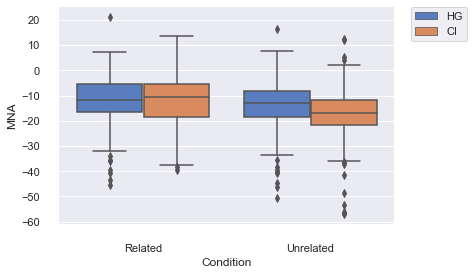

In [52]:
def boxplot(df,x,y,z):
    ax = sns.boxplot(x=x, y=y,
                hue=z,
                data=df)
    sns.despine(offset=10, trim=True)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # also doesn't have an option to save? not sure how to fix this
    
boxplot(df,x[0],y[0],x[1])